# MNIST Example Using TensorFlow 

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.style
import matplotlib.pyplot as mpl
mpl.style.use('classic')
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
sample = mnist.train.images[2].reshape(28,28)


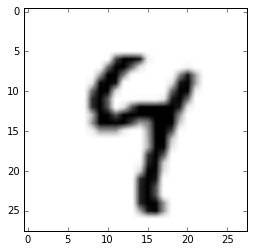

In [6]:
mpl.imshow(sample,cmap='Greys')

In [7]:
#One can play around with the learning_rate and training_epochs
#to see how it influences the accuracy

learning_rate = 0.001
training_epochs = 15
batch_size = 128

In [8]:
#NETWORK PARAMETERS

n_classes = 10
n_samples = mnist.train.num_examples

In [9]:
n_input = 784 #How many neurons per hidden layer

# The higer the number of hidden layers, the higher the accuracy

n_hidden_1 = 256
n_hidden_2 = 256

In [10]:
# Cost function is used to evaluate how far off we are from what we want
# How many classes were correctly classified
# We apply an optimizer function to try and minimize the error(by adjusting the weight values 
# accordingly accross the entire neural net)

def multilayer_perceptron(x,weights,biases):
    
    '''
    x: Placeholders for Data input
    weights: Dictionary of weights
    Biases: Dict of bias values
    
    '''
    
    # First Hidden Layer with ReLU Activation Function
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    
    #ReLU(X * W + B) = ReLU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    
    # Last Output Layer
    
    out_layer = tf.matmul(layer_2,weights['out'])+ biases['out']
    
    return out_layer

In [11]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [12]:
biases ={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))    
}

In [13]:
# Set two placeholders for x and y

x = tf.placeholder('float',[None,n_input])

In [14]:
y = tf.placeholder('float',[None,n_classes])

In [15]:
predictions = multilayer_perceptron(x,weights,biases)

In [16]:
# Cost and Optimizer Functions

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=predictions))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


# Training The NN

In [17]:
 # Convenience function available in the mnist data object
    t = mnist.train.next_batch(1)

In [18]:
Xsamp,ysamp =t

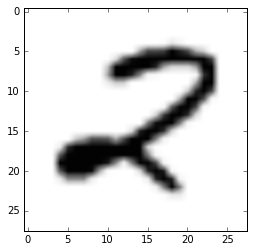

In [19]:
mpl.imshow(Xsamp.reshape(28,28),cmap='Greys')

# Run Session

In [20]:
sess = tf.InteractiveSession()

In [21]:
init = tf.global_variables_initializer()

In [22]:
sess.run(init)

In [32]:
# 15 loops
for epoch in range(training_epochs):
    #Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
                      
    for i in range(total_batch):
       
       batch_x,batch_y = mnist.train.next_batch(batch_size)
                      
                      
       _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})   
                      
       avg_cost += c/total_batch
                      
    print('Epoch: {}  cost: {:.4f}'.format(epoch+1,avg_cost))   
print('Model has completed {} Epochs of training'.format(training_epochs))                      

Epoch: 1  cost: 0.2778
Epoch: 2  cost: 0.2333
Epoch: 3  cost: 0.2083
Epoch: 4  cost: 0.1777
Epoch: 5  cost: 0.1827
Epoch: 6  cost: 0.1657
Epoch: 7  cost: 0.1616
Epoch: 8  cost: 0.2405
Epoch: 9  cost: 0.2009
Epoch: 10  cost: 0.1691
Epoch: 11  cost: 0.1525
Epoch: 12  cost: 0.1748
Epoch: 13  cost: 0.1272
Epoch: 14  cost: 0.1145
Epoch: 15  cost: 0.1477
Model has completed 15 Epochs of training


## Evaluate the Model

In [33]:
correct_predictions = tf.equal(tf.argmax(predictions,1),tf.argmax(y,1))

In [34]:
print(correct_predictions[0])

Tensor("strided_slice_2:0", shape=(), dtype=bool)


In [35]:
correct_predictions = tf.cast(correct_predictions,'float')

In [36]:
print(correct_predictions[0])

Tensor("strided_slice_3:0", shape=(), dtype=float32)


In [37]:
accuracy = tf.reduce_mean(correct_predictions)

In [38]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [39]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})*100

95.80000042915344